<a href="https://colab.research.google.com/github/Animesh-roy100/mandelbrot-set/blob/main/Mandelbrot_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Mandelbrot set 
# {n} such that z -> z*z + n 
# remains finite

# n=0 -> 0,0,0,
# n=1 -> 0, 1, 2, 5, 26 -> explodes
# n=-1 -> 0, -1 -> does not explodes (remains finite)
# n = -2 -> remains finite
# n = -3 -> explodes

In [22]:
n = -3
z = 0

In [23]:
z = z * z + n
z

-3

In [24]:
%pylab inline
import numpy

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['re']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
x = numpy.arange(-3, 3, 1)
z = numpy.zeros_like(x)
arr = [x]
for i in range(10):
    z = z*z + x
    arr.append(numpy.abs(z))

In [26]:
arr

[array([-3, -2, -1,  0,  1,  2]),
 array([3, 2, 1, 0, 1, 2]),
 array([6, 2, 0, 0, 2, 6]),
 array([33,  2,  1,  0,  5, 38]),
 array([1086,    2,    0,    0,   26, 1446]),
 array([1179393,       2,       1,       0,     677, 2090918]),
 array([1390967848446,             2,             0,             0,
               458330, 4371938082726]),
 array([4803239468103370753,                   2,                   1,
                          0,        210066388901, 8919542782688501670]),
 array([5896182132306350078,                   2,                   0,
                          0, 3275921592928522330, 8557206234556948570]),
 array([6885468643577020417,                   2,                   1,
                          0, 6521269100592521125, 7113761450777878438]),
 array([ 598872920952963074,                   2,                   0,
                          0, 4807096813913104474, 1704545774845796262])]

In [27]:
for line in arr:
    print("\t\t".join(map(str,line)))

-3		-2		-1		0		1		2
3		2		1		0		1		2
6		2		0		0		2		6
33		2		1		0		5		38
1086		2		0		0		26		1446
1179393		2		1		0		677		2090918
1390967848446		2		0		0		458330		4371938082726
4803239468103370753		2		1		0		210066388901		8919542782688501670
5896182132306350078		2		0		0		3275921592928522330		8557206234556948570
6885468643577020417		2		1		0		6521269100592521125		7113761450777878438
598872920952963074		2		0		0		4807096813913104474		1704545774845796262


In [28]:
x = numpy.arange(-3, 3, 0.01)
z = numpy.zeros_like(x)
arr = [x]
for i in range(100):
    z = z*z + x
    arr.append(numpy.abs(z)<10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


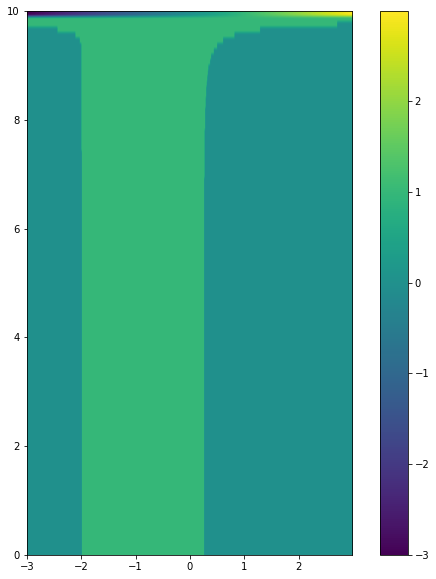

In [29]:
figure(figsize=(10,10))
imshow(arr, extent=(x.min(), x.max(), 0, 10))
colorbar()

In [30]:
max(x[arr[-1]])

0.24999999999993072

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


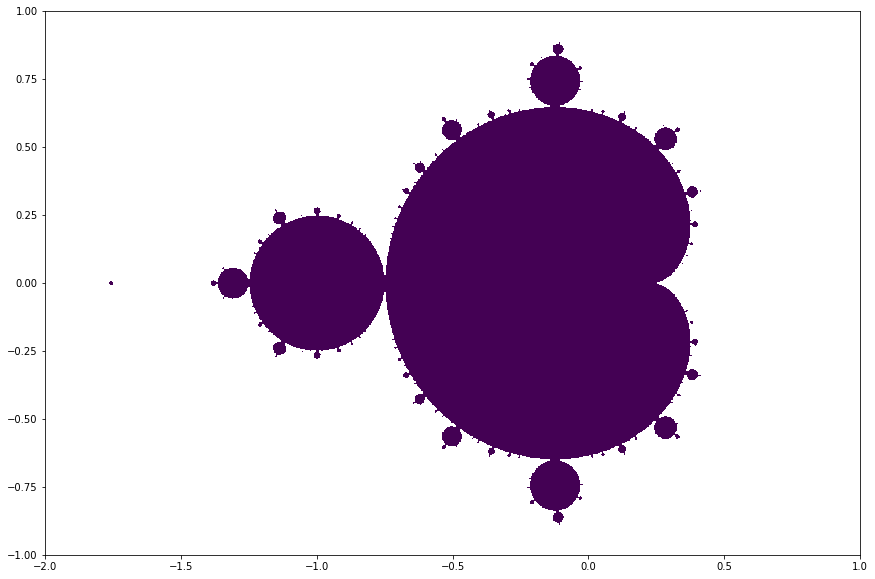

In [31]:
x, X = -2, 1
y, Y = -1, 1

delta = 0.001


re, im = numpy.mgrid[x:X:delta, y:Y:delta]
c = (re + 1j*im).reshape(im.shape[0], -1).T

z = numpy.zeros_like(c)
for i in range(100):
    z = z*z + c # mandelbrot eqn
    
figure(figsize=(20,10))
imshow(numpy.absolute(z), extent=(x,X,y,Y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in absolute
  


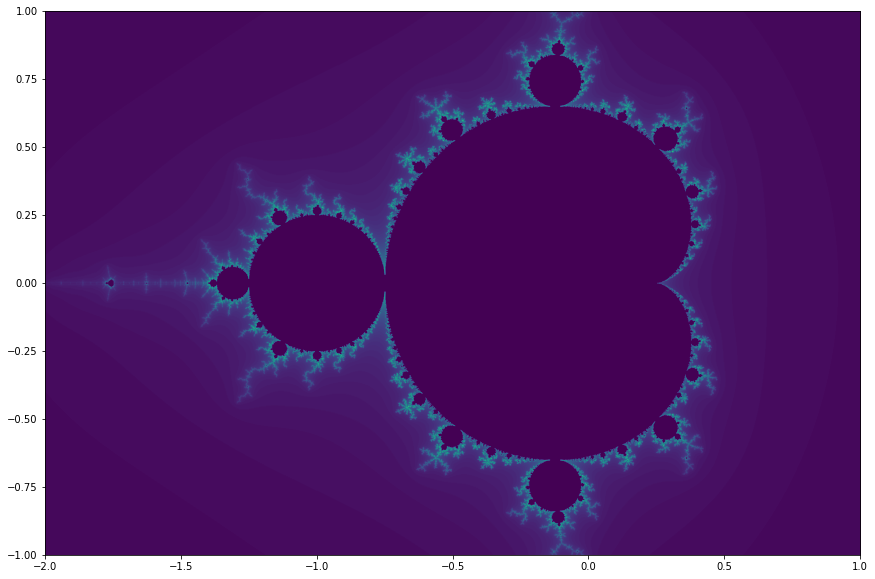

In [32]:
x, X = -2, 1
y, Y = -1, 1

delta = 0.001


re, im = numpy.mgrid[x:X:delta, y:Y:delta]
c = (re + 1j*im).reshape(im.shape[0], -1).T

z = numpy.zeros_like(c)
escape = numpy.zeros_like(numpy.absolute(c))
for i in range(100):
    z = z*z + c # mandelbrot eqn
    idx = (numpy.absolute(z) > 4) & (escape == 0)
    escape[idx]  = i
    
figure(figsize=(20,10))
imshow(escape, extent=(x,X,y,Y))

In [33]:
def plot_mandelbrot(x, X, y, Y):
    delta = (X-x)/300
    re, im = numpy.mgrid[x:X:delta, y:Y:delta]
    c = (re + 1j*im).reshape(im.shape[0], -1).T

    z = numpy.zeros_like(c)
    escape = numpy.zeros_like(numpy.absolute(c))
    for i in range(100):
        z = z*z + c # mandelbrot eqn
        idx = (numpy.absolute(z) > 4) & (escape == 0)
        escape[idx]  = i

    imshow(escape, extent=(x,X,y,Y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in absolute
  # Remove the CWD from sys.path while we load stuff.


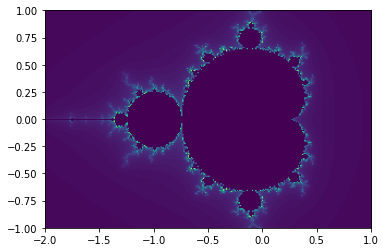

In [34]:
plot_mandelbrot(-2,1,-1,1)

In [35]:
def plot_mandelbrot_at(x, y, D):
    return plot_mandelbrot(x-D, x+D, y-D, y+D)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in absolute
  # Remove the CWD from sys.path while we load stuff.


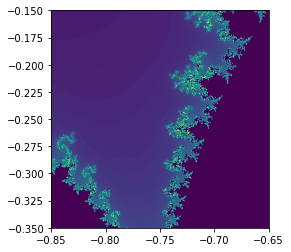

In [36]:
plot_mandelbrot_at(-.75, -.25, .1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in absolute
  del sys.path[0]


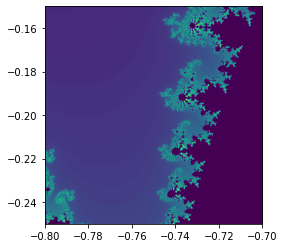

In [37]:
x, X = -.8, -.7
y, Y = -.25, -.15

delta = 0.0001

re, im = numpy.mgrid[x:X:delta, y:Y:delta]
c = (re + 1j*im).reshape(im.shape[0], -1).T

z = numpy.zeros_like(c)
escape = numpy.zeros_like(numpy.absolute(c))
for i in range(100):
    z = z*z + c # mandelbrot eqn
    idx = (numpy.absolute(z) > 4) & (escape == 0)
    escape[idx]  = i

imshow(escape, extent=(x,X,y,Y))